# Sparse matrices and applications
In this notebook, we give exmaples of sparse matrices encontered in various applications such as partial diferential equations (PDEs) ans power flow systems. 

## Sparse matrix in PDEs
In this example, we use the [FEniCS](https://fenicsproject.org/) package to express a simple partial differential equation and generate the associated sparse matrix that need to be solve in the context of finite element method for solving the initial problem.

In this example we use a 2D poisson equation and its implementation with FEniCS is largely inspired by [this demo](https://fenicsproject.org/docs/dolfin/2018.1.0/python/demos/poisson/demo_poisson.py.html) available in the documentation. 

In [155]:
import matplotlib.pylab as plt

from dolfin import *
print dolfin.dolfin_version()

2017.2.0


### Description of the variationel problem

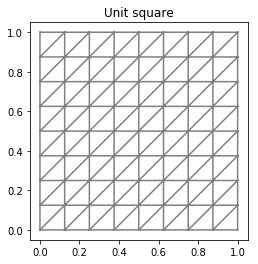

In [156]:
# Create mesh and define function space
N = 8 # mesh dimension
mesh = UnitSquareMesh(N, N)
#V = FunctionSpace(mesh, "Lagrange", 1)
V = FunctionSpace(mesh, "P", 1)
plot(mesh, title="Unit square")

In [157]:
def boundary(x, on_boundary):
    return on_boundary
# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

# Define trial and test functions in the function space V
u = TrialFunction(V)
v = TestFunction(V)
# Define source terms
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("sin(5*x[0])", degree=1)
# Define the variational problem
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

### Generate stiffness matrix

In [158]:
A, rhs = assemble_system(a, L, bc)
A.array().shape

(81, 81)

We use the `spy` function from mathplotlib to look at the sparsity pattern of our stiffness matrix A. Non-zeros coefficients are shown as black dots whereas the rest, in white, corresponds to zero elements.

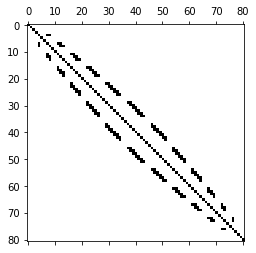

In [159]:
plt.spy(A.array())

## Sparse Matrix in power systems

In [160]:
import matplotlib.pylab as plt

import pandapower as pp
import pandapower.networks as nw

In [161]:
# net = nw.example_simple()
net = nw.mv_oberrhein("generation")

Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [162]:
pp.runpp(net, numba=False)

### Admittance matrix

In [163]:
Y = net._ppc["internal"]["Ybus"]
Y.shape

(185, 185)

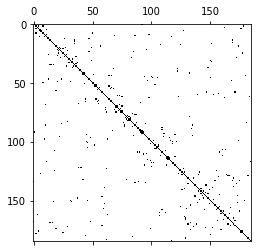

In [164]:
plt.spy(Y.todense())

### Jacobian Matrix
Jacobian matrix obtained at the last iteration step of the Newton-Raphson method.

In [165]:
J = net._ppc["internal"]["J"]
J.shape

(366, 366)

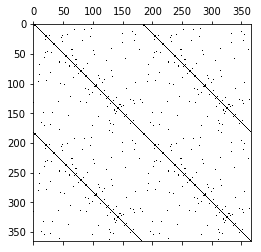

In [154]:
plt.spy(J.todense())